* PATHL=/home/asif/Code/Godhuli/superstore_sales_analysis/Data/superstore.csv
* PATHW=/superstore_sales_analysis/Data/superstore.csv
* Dataset link = https://www.kaggle.com/datasets/zafarali27/car-price-prediction

# Importing Libraries

In [170]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly.express as px
import plotly.graph_objs as go

# Reading the Data

In [171]:
df = pd.read_csv('./Data/car_price_prediction_.csv')

In [173]:
df.tail()

Car ID   Brand  Year  Engine Size Fuel Type Transmission  Mileage  \
2495    2496    Audi  2020          2.4    Petrol    Automatic    22650   
2496    2497    Audi  2001          5.7    Hybrid       Manual    77701   
2497    2498    Ford  2021          1.1    Hybrid       Manual   272827   
2498    2499    Audi  2002          4.5    Diesel       Manual   229164   
2499    2500  Toyota  2005          4.6    Diesel    Automatic    80978   

     Condition     Price   Model  
2495  Like New  61384.10      Q5  
2496  Like New  24710.35      A3  
2497  Like New  29902.45  Fiesta  
2498  Like New  46085.67      Q5  
2499      Used  16594.14    RAV4

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


<Axes: >

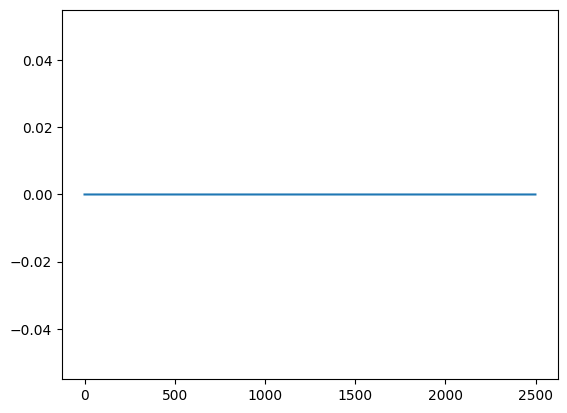

In [6]:
df.isnull().sum(axis=1).plot()

In [7]:
df.describe()

Car ID       Year  Engine Size        Mileage         Price
count  2500.00000  2500.0000  2500.000000    2500.000000   2500.000000
mean   1250.50000  2011.6268     3.465240  149749.844800  52638.022532
std     721.83216     6.9917     1.432053   87919.952034  27295.833455
min       1.00000  2000.0000     1.000000      15.000000   5011.270000
25%     625.75000  2005.0000     2.200000   71831.500000  28908.485000
50%    1250.50000  2012.0000     3.400000  149085.000000  53485.240000
75%    1875.25000  2018.0000     4.700000  225990.500000  75838.532500
max    2500.00000  2023.0000     6.000000  299967.000000  99982.590000

In [8]:
# Checking for Duplicates
if df.duplicated().sum() > 0:
    print("Duplicate exits")
else:
    print("No duplicates")

No duplicates


#### There is no null and duplicate value in our dataset

# EDA

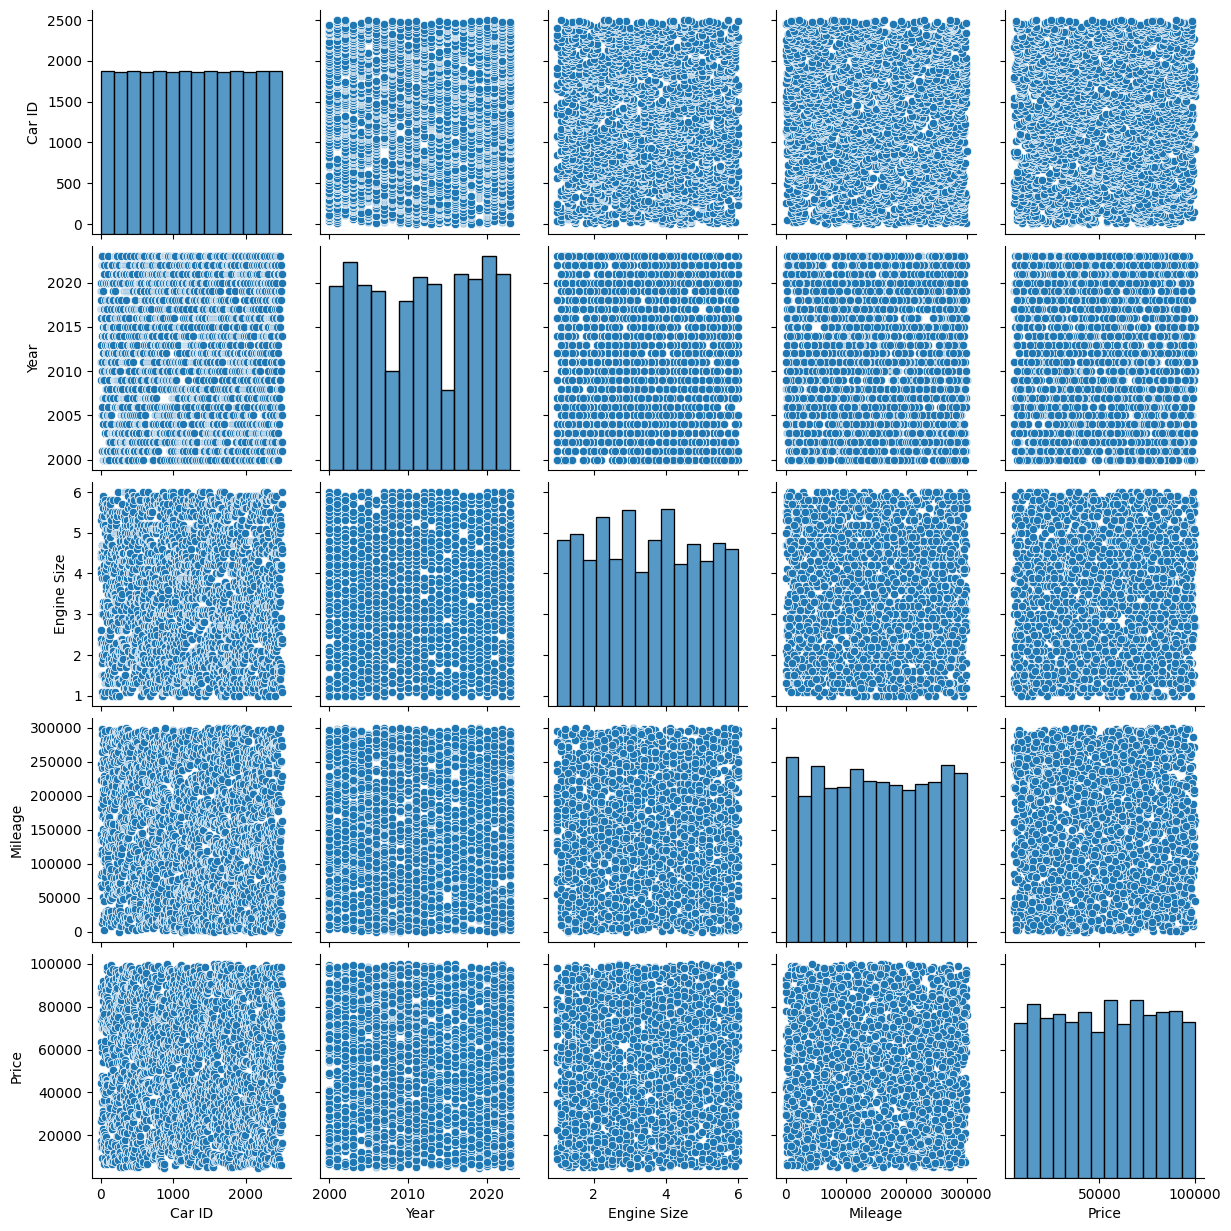

In [9]:
sns.pairplot(df)

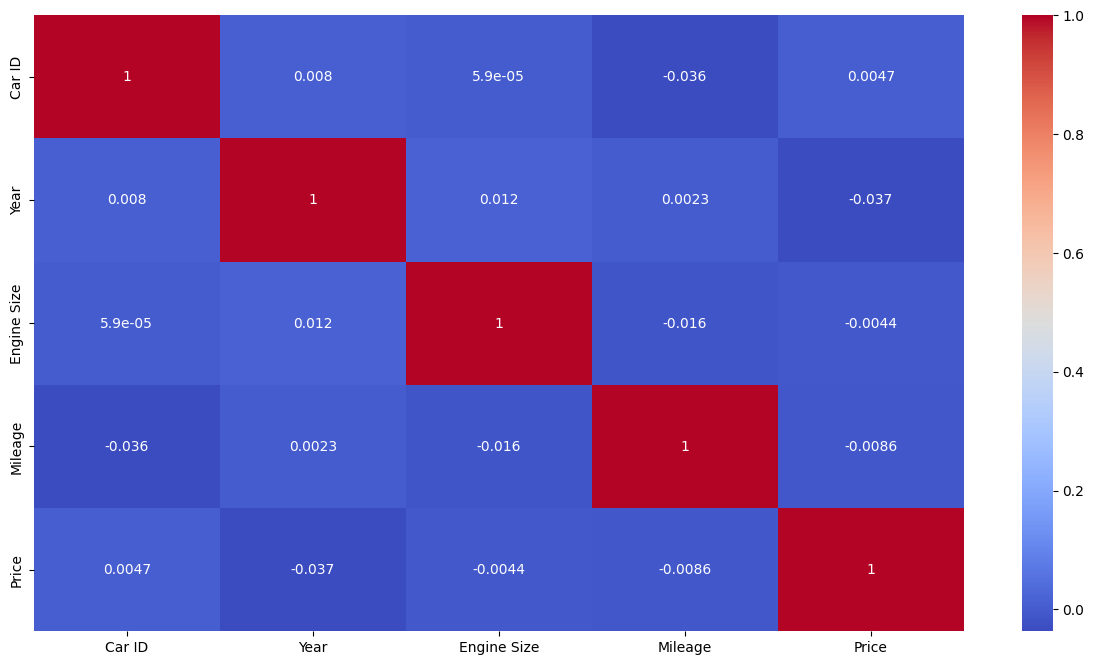

In [10]:
corr_matrix = df.select_dtypes(include=["float64", "int64"]).corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

#### There is hardly any linear relation with the price 

In [11]:
df.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [12]:
brands = df['Brand'].unique()
fuel_type = df['Fuel Type'].unique()
transmission = df['Transmission'].unique()
condittion = df['Condition'].unique()
model = df['Model'].unique()
print(f'Brands:', brands)
print(f'Fuel Tye:',fuel_type)
print(f'Transmission:',transmission)
print(f'Condition:',condittion)
print(f'Model:',model)

Brands: ['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']
Fuel Tye: ['Petrol' 'Electric' 'Diesel' 'Hybrid']
Transmission: ['Manual' 'Automatic']
Condition: ['New' 'Used' 'Like New']
Model: ['Model X' '5 Series' 'A4' 'Model Y' 'Mustang' 'Q7' 'Q5' 'Civic'
 'Explorer' 'Model 3' 'Fiesta' 'X3' 'GLA' 'A3' 'X5' 'C-Class' 'E-Class'
 'CR-V' 'Camry' 'Accord' 'GLC' 'Corolla' 'Fit' 'Model S' 'Prius'
 '3 Series' 'RAV4' 'Focus']


# Understanding the features of the dataset

* Brand and Model: How different brands and models of cars affect the price?
* Are luxury brands more expensive?
* Year of Manufacture: How does the year of manufacture affect the price?
* Are there any notable trends for specifoc brands?
* Engine Size: How does the engine size affect the price? Does a larger engine size mean a higher price? how does the engine size affect the price for different brands, fuel types? 
* Mileage: How does the mileage affect the price? Does a higher mileage mean a lower price?
* Fuel Type: How does the fuel type affect the price? Are diesel cars more expensive than petrol cars? Are electric cars priced hgher due to their tecnology, or do they vary based on other factors?
* Transmission: How does the transmission type affect the price? Are automatic cars more expensive than manual cars?

### Price

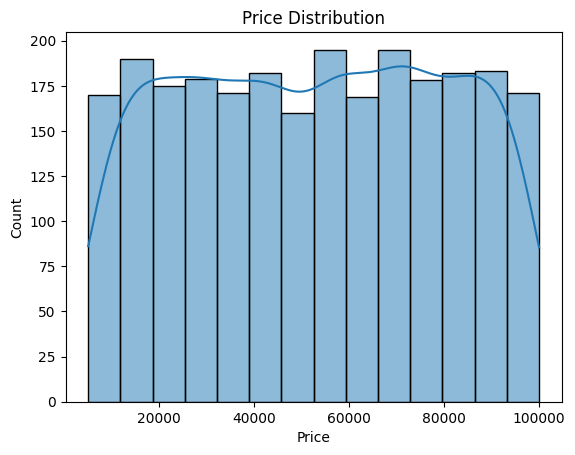

In [13]:
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

There isn't a clear pick or central tendency in the distribution. There could be a large number of outliers spread across the range of prices.So we will check for outliers in the price column.

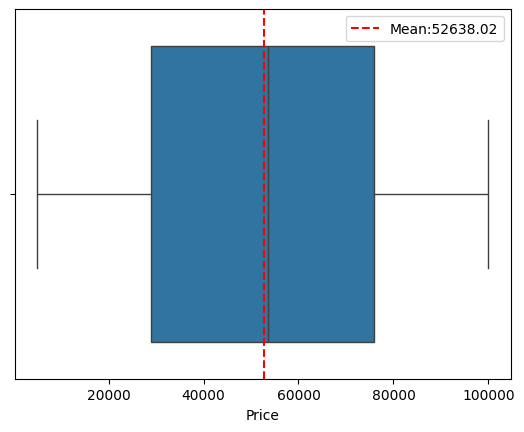

In [14]:
sns.boxplot(x=df['Price'])
mean_price = df['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean:{mean_price:.2f}')

plt.legend()
plt.show()

In [15]:
from scipy import stats

z_scores = stats.zscore(df["Price"])
abs_z_scores = abs(z_scores)
outliers = abs_z_scores > 3  # Threshold of 3
outliers_df = df[outliers]
print(outliers_df)  # This will show any outliers

Empty DataFrame
Columns: [Car ID, Brand, Year, Engine Size, Fuel Type, Transmission, Mileage, Condition, Price, Model]
Index: []


Apparantly, the price columns has no outliers.

## Brand and Model

In [17]:
brands

array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

<Axes: xlabel='Brand', ylabel='count'>

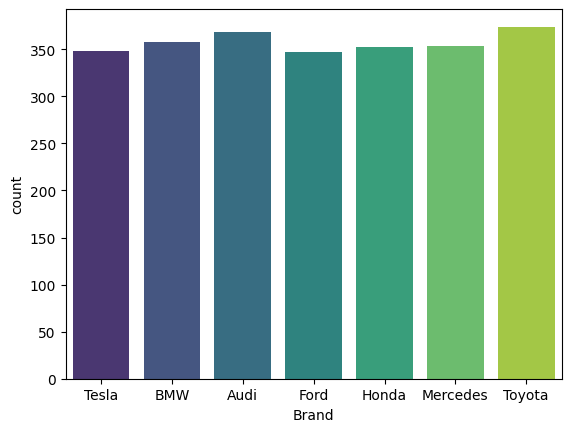

In [90]:
sns.countplot(df, x="Brand", hue="Brand", palette="viridis", legend=False)

  Types of Brand         Price
1            BMW  54157.114385
5          Tesla  53475.547471
4       Mercedes  53191.090085
6         Toyota  52078.728235
3          Honda  52050.283949
0           Audi  51953.424810
2           Ford  51593.254813


<BarContainer object of 7 artists>

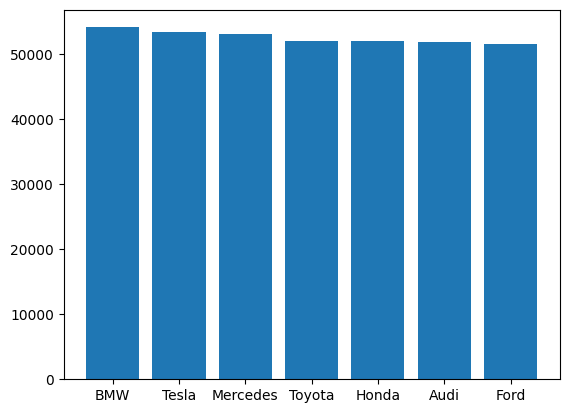

In [92]:
price_per_brand = df.groupby('Brand',observed=True)['Price'].mean().reset_index()
price_per_brand = price_per_brand.rename(columns={'Brand':'Types of Brand'})
price_per_brand = price_per_brand.sort_values(by='Price',ascending=False)

print(price_per_brand)

plt.bar(price_per_brand['Types of Brand'], price_per_brand['Price'])

BMW is the most expensive brand in the dataset, followed by Tesla and Mercedes, while Ford is the most affordable. Toyota and Audi have the highest counts reflecting these mid range brands are more common in the dataset.

In [19]:
price_by_model = (df.groupby(["Brand","Model"], observed=True)["Price"].mean().reset_index())
price_by_model= price_by_model.sort_values(by='Price',ascending=False)

print(price_by_model)

       Brand     Model         Price
19  Mercedes       GLC  59544.773750
4        BMW  3 Series  58561.123548
24    Toyota     Camry  56405.516111
5        BMW  5 Series  55986.422796
10      Ford     Focus  55677.760000
15     Honda       Fit  55369.341236
20     Tesla   Model 3  55142.083563
23     Tesla   Model Y  54708.899101
25    Toyota   Corolla  53782.605534
2       Audi        Q5  53432.295949
16  Mercedes   C-Class  53080.840761
21     Tesla   Model S  52887.345823
12     Honda    Accord  52799.983523
3       Audi        Q7  52594.554211
8       Ford  Explorer  52117.953953
1       Audi        A4  51554.915000
17  Mercedes   E-Class  51358.704157
9       Ford    Fiesta  51313.160777
27    Toyota      RAV4  51248.733636
22     Tesla   Model X  51235.880753
6        BMW        X3  51021.077391
0       Audi        A3  50530.147551
7        BMW        X5  50517.325250
13     Honda      CR-V  50046.228316
14     Honda     Civic  49912.979250
18  Mercedes       GLA  49549.031304
1

In [128]:
import plotly.io as pio

pio.renderers.default = "notebook"
fig = px.treemap(price_by_model, path=['Brand', 'Model'], values='Price',
				 title="Impact of Barand and Model on Price (Treemap)",
				 color='Price', hover_data=['Price'],
				 color_continuous_scale='RdYlBu')

fig.update_layout(template='plotly_dark', width=800, height=600)
fig.write_html("brandModel.html")

import webbrowser

webbrowser.open("brandModel.html")

True

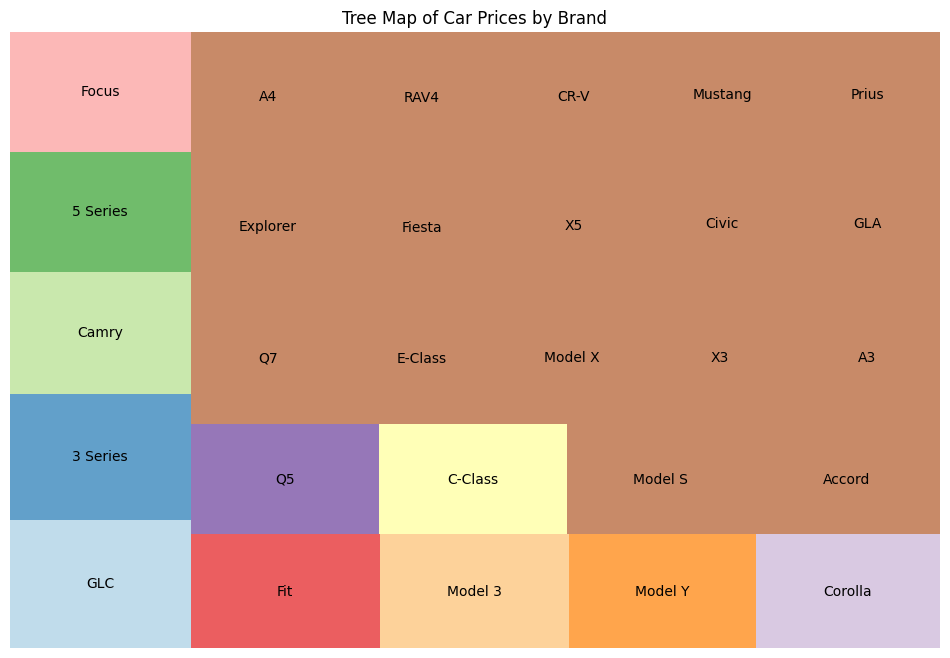

In [96]:
import squarify

plt.figure(figsize=(12,8))
squarify.plot(sizes=price_by_model['Price'], label=price_by_model['Model'],  alpha=0.7, color=plt.cm.Paired(range(len(price_by_model))))
plt.title('Tree Map of Car Prices by Brand')
plt.axis('off')
plt.show()

BMW ranks as a top luxury brand with high price, but the cost varies by model. The Mercedes' GLC is the pricest model in the dataset, while BMW's 3 seires is priced slightly lower, illustrating how model-specific influence car pricing.

## Year of Manufacture

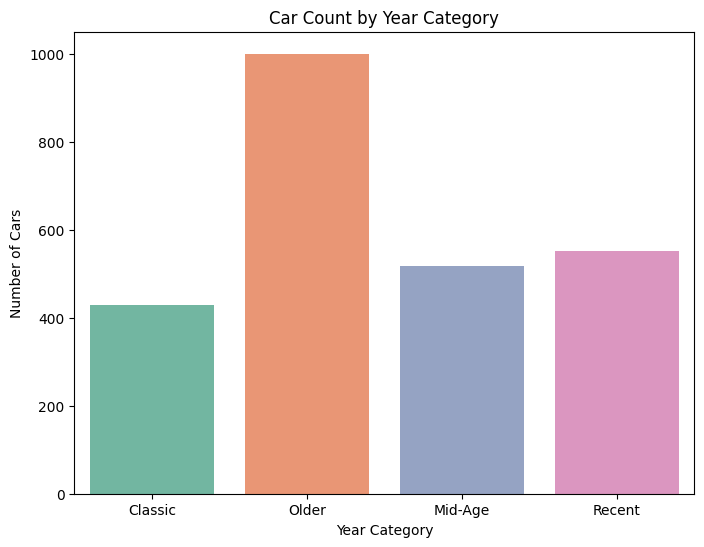

In [104]:
bins = [
    0,
    2003,
    2013,
    2018,
    2024,
]  # Define year range for classic, older, mid-age, recent
labels = ["Classic", "Older", "Mid-Age", "Recent"]  # Labels for each bin

# Create a new column with categorized year ranges
df["Year_Category"] = pd.cut(df["Year"], bins=bins, labels=labels, right=True)

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x="Year_Category", data=df,hue="Year_Category", palette="Set2", legend=False)
plt.title("Car Count by Year Category")
plt.xlabel("Year Category")
plt.ylabel("Number of Cars");

The 'Older" category has nearlly twice the count of 'Mid-Age' and 'Recent' categories. This is typical for used car datsets

C:\Users\asif\AppData\Local\Temp\ipykernel_15900\1855041735.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='count', ylabel='Condition'>

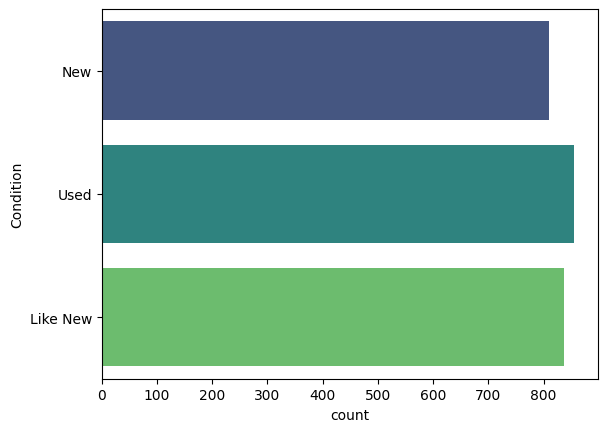

In [24]:
sns.countplot(df['Condition'], palette='viridis')

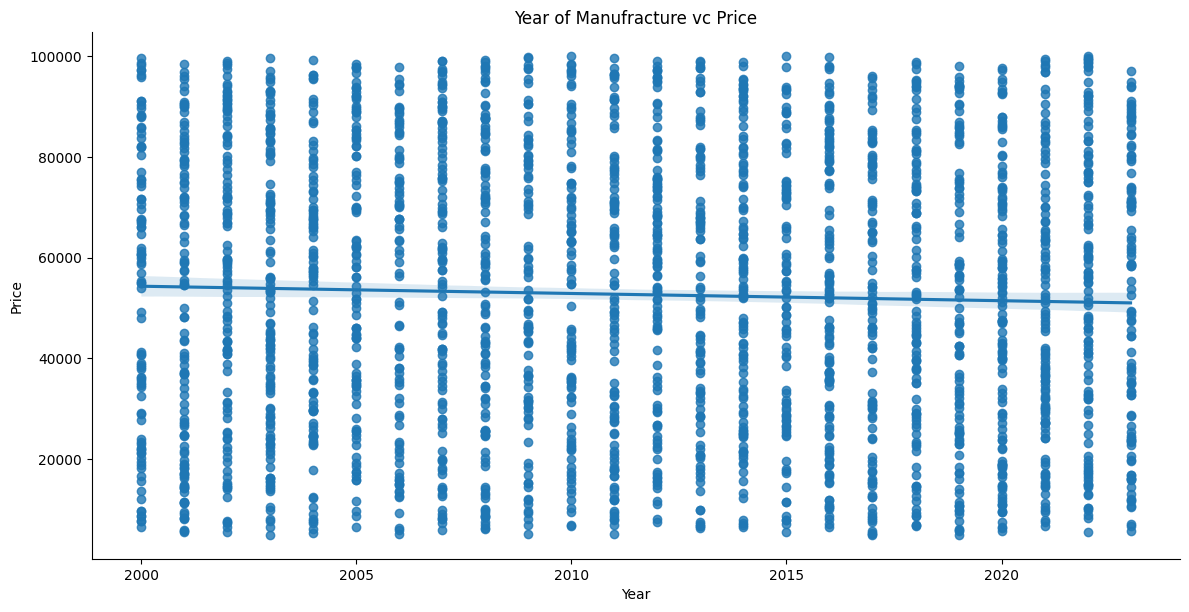

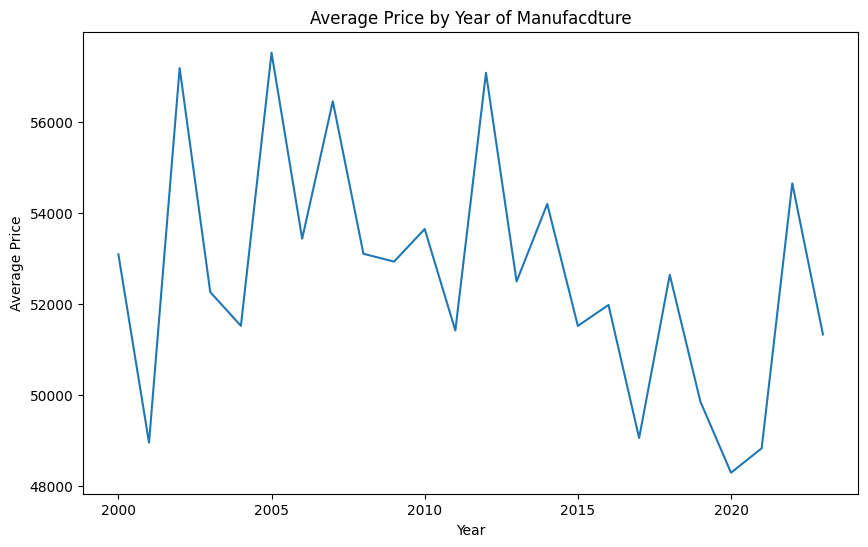

In [26]:
sns.lmplot(x='Year', y='Price', data=df, aspect=2, height=6)
plt.title("Year of Manufracture vc Price")
plt.show()

yearly_avg_price = df.groupby('Year', observed=True)['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Price', data=yearly_avg_price)
plt.title('Average Price by Year of Manufacdture')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [130]:
yearly_avg_price = yearly_avg_price.sort_values(by='Price', ascending=False)
yearly_avg_price

Year         Price
5   2005  57534.323592
2   2002  57197.476000
12  2012  57092.138378
7   2007  56464.203545
22  2022  54656.139554
14  2014  54202.577248
10  2010  53650.244632
6   2006  53437.595930
8   2008  53104.788716
0   2000  53094.163441
9   2009  52932.735778
18  2018  52640.946604
13  2013  52495.034737
3   2003  52260.187373
16  2016  51977.464068
4   2004  51517.976900
15  2015  51516.460909
11  2011  51414.871188
23  2023  51328.692718
19  2019  49848.339029
17  2017  49045.689175
1   2001  48944.057706
21  2021  48819.715089
20  2020  48281.739426

The year of manufacture seems to affect car prices,though inconsistently. The price drop during the 2008 financial crisis might reflect economic struggles, while the rise after 2010 could be linked to recovery and demand for newer models. The dip in 2020 likely reflects the COVID-19 pandemic's impact on production.However, other factors might also be influencing these price changes.Throughout the year the mean price of car is decreaing. For example on 2022 the mean price was $54656, whereas on 2023 it decreased to $51328.

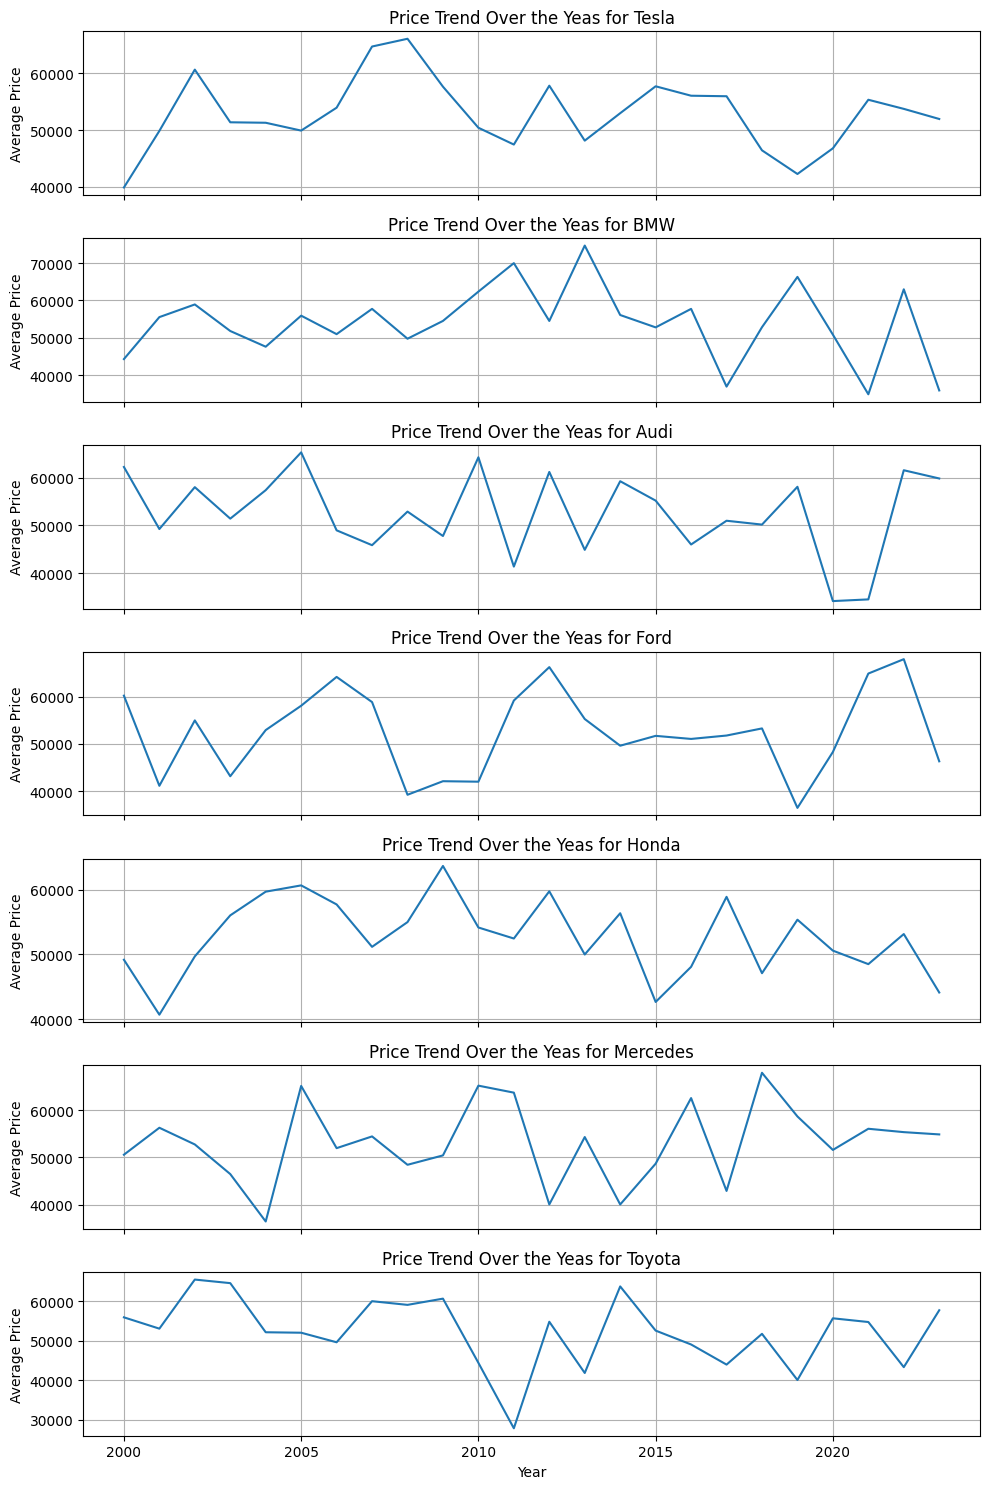

In [27]:
fig, axes = plt.subplots(len(brands), 1, figsize=(10,15), sharex=True)

for i, brand in enumerate (brands):
	brand_data = df[df['Brand']== brand]
	year_price = brand_data.groupby('Year', observed=True)['Price'].mean()
	sns.lineplot(x=year_price.index, y=year_price.values, ax=axes[i])
	axes[i].set_title(f'Price Trend Over the Yeas for {brand}')
	axes[i].set_ylabel('Average Price')
	axes[i].grid(True)

axes[-1].set_xlabel('Year')

plt.tight_layout()
plt.show()

### Trends for specific brands:

* Tesla: Tesla's average price shoows an upward trend, particularly after 2020. This could reflect increasing demand for electric vehicles. 

* BMW: BMW's price trend displays marked fluctuations, wth significant peaks around 2007 and 2015. The notable dips around 2009 and 2010may reflect the impact of the global financial crisis, which reduced demand for luxury vehicles.

* Audi: Audi's prices renain relatively stable, with minor fluctuations. There is a slight dip around 2015.

* Ford: Ford maintains a stable price trend overall, with a notable dip around 2018. Ford's prices also show an increase post-2020, likely due to pandemic-related supply chain disruptions and inflationary pressures.

* Honda: Honda's pricing shows remarkable stability, reflecting the brand's consistent focus on affordable, reliable vehicles.There is a minor fluctuations from 2010 to 2015.

* Mecedes: Mercedes demonstrates peaks and declines that align with economic cycles, similar to BMW. the decline around 2009 could correspond to decreased demand for luxury models with advanced technology and performance features. 

* Toyota: Toyota's trend is generally steady, with minor peaks and dips. There is a slight decline around 2015. The price rise ppost-2020 likely reflects increased demand for it's demand of eco-friendly models.

Each brand's trend reflects its positioning and response to external factors:
* Luxury Brands (e.g.,BMW, Mercedes) exhibit price sensivity to economic conditions and consumer interest in luxuray features.
* Mainstream Brands (e.g., Toyota, Ford, Honda) show stability with adjsutments in line with strategic shifts, such as ford's focus on SUVs. 

These patterns underscore how brand strategy and market conditions influence vehicle prices over time. 

# Engine Size

In [28]:
# Engine Size vs Price

engine_sizes = sorted([float(size) for size in df['Engine Size'].unique()])
print(f'Engine Sizes: {engine_sizes}')
print(f'Engine Size: {len(engine_sizes)}')

Engine Sizes: [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]
Engine Size: 51


In [29]:
price_by_engine_sizes = df.groupby(["Engine Size"])['Price'].mean().reset_index()

price_by_engine_sizes = price_by_engine_sizes.sort_values(by='Price', ascending=False)

price_by_engine_sizes

Engine Size         Price
0           1.0  63055.862174
39          4.9  60412.181818
12          2.2  60128.343036
40          5.0  59225.440189
14          2.4  58908.706275
22          3.2  58352.850200
26          3.6  58145.160250
41          5.1  58076.623684
21          3.1  57978.865536
47          5.7  57376.011698
8           1.8  56324.157833
27          3.7  56247.160784
48          5.8  56095.616346
35          4.5  55537.562857
43          5.3  55530.055682
3           1.3  55364.406377
34          4.4  54899.584107
13          2.3  54657.231304
24          3.4  54488.729615
6           1.6  54101.372791
28          3.8  54011.187800
17          2.7  53698.553833
7           1.7  53180.426458
9           1.9  52358.001633
38          4.8  52106.332679
49          5.9  51528.421429
18          2.8  51185.380217
36          4.6  51147.339211
37          4.7  50807.021800
11          2.1  50733.940926
33          4.3  50722.700682
46          5.6  50437.133846
10          2.0  50422.837255
2           1.2  50221.786875
25          3.5  50148.822195
50          6.0  50074.717600
29          3.9  50062.489385
16          2.6  49991.217358
15          2.5  49811.183542
42          5.2  49445.579592
31          4.1  49349.168444
1           1.1  49283.210000
20          3.0  49241.841475
4           1.4  49117.872407
19          2.9  47721.910000
5           1.5  47233.087907
45          5.5  46780.018636
23          3.3  46316.419556
30          4.0  44872.614211
44          5.4  44525.201765
32          4.2  44376.548980

             Engine Size     Price
Engine Size     1.000000 -0.063719
Price          -0.063719  1.000000


<Axes: xlabel='Engine Size', ylabel='Price'>

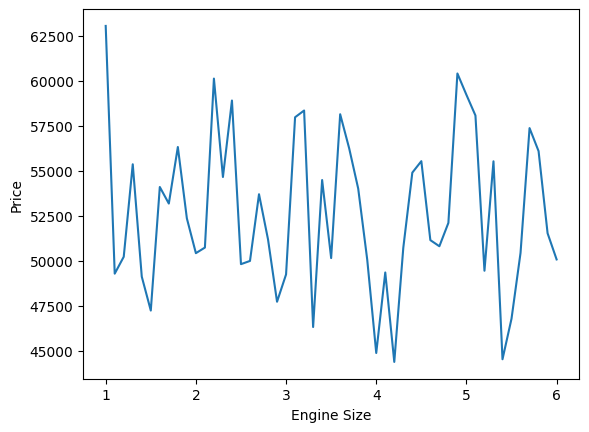

In [30]:
print(price_by_engine_sizes.corr())
sns.lineplot(x='Engine Size', y='Price',data=price_by_engine_sizes)

Based on the plot, there doesn't seem to be a strong linear relationship between the two variables.The correlation coefficient between Engine Size and Price is -0.064, which is very is close to zero. This suggests that there is almost no linear correlation between engine size and price in the dataset. Larger enzine sizes do not consistently correlate with higher or lower prices in this case.

So, we are gonna check how other factors along engine size affects the prize. 

### Brand and Engine Size and Price

In [132]:
price_by_engine_sizes_brand = df.groupby(['Brand','Engine Size'], observed=True)['Price'].mean().reset_index()

price_by_engine_sizes_brand = price_by_engine_sizes_brand.sort_values(by='Price',ascending=False)

price_by_engine_sizes_brand

Brand  Engine Size         Price
19       Audi          2.9  83695.077500
204  Mercedes          1.0  79188.376000
243  Mercedes          4.9  78115.114000
86        BMW          4.5  77815.700000
303     Tesla          5.8  77722.525714
..        ...          ...           ...
254  Mercedes          6.0  19803.553333
33       Audi          4.3  15495.960000
306    Toyota          1.0  11927.120000
236  Mercedes          4.2   8712.123333
101       BMW          6.0   8126.210000

[357 rows x 3 columns]

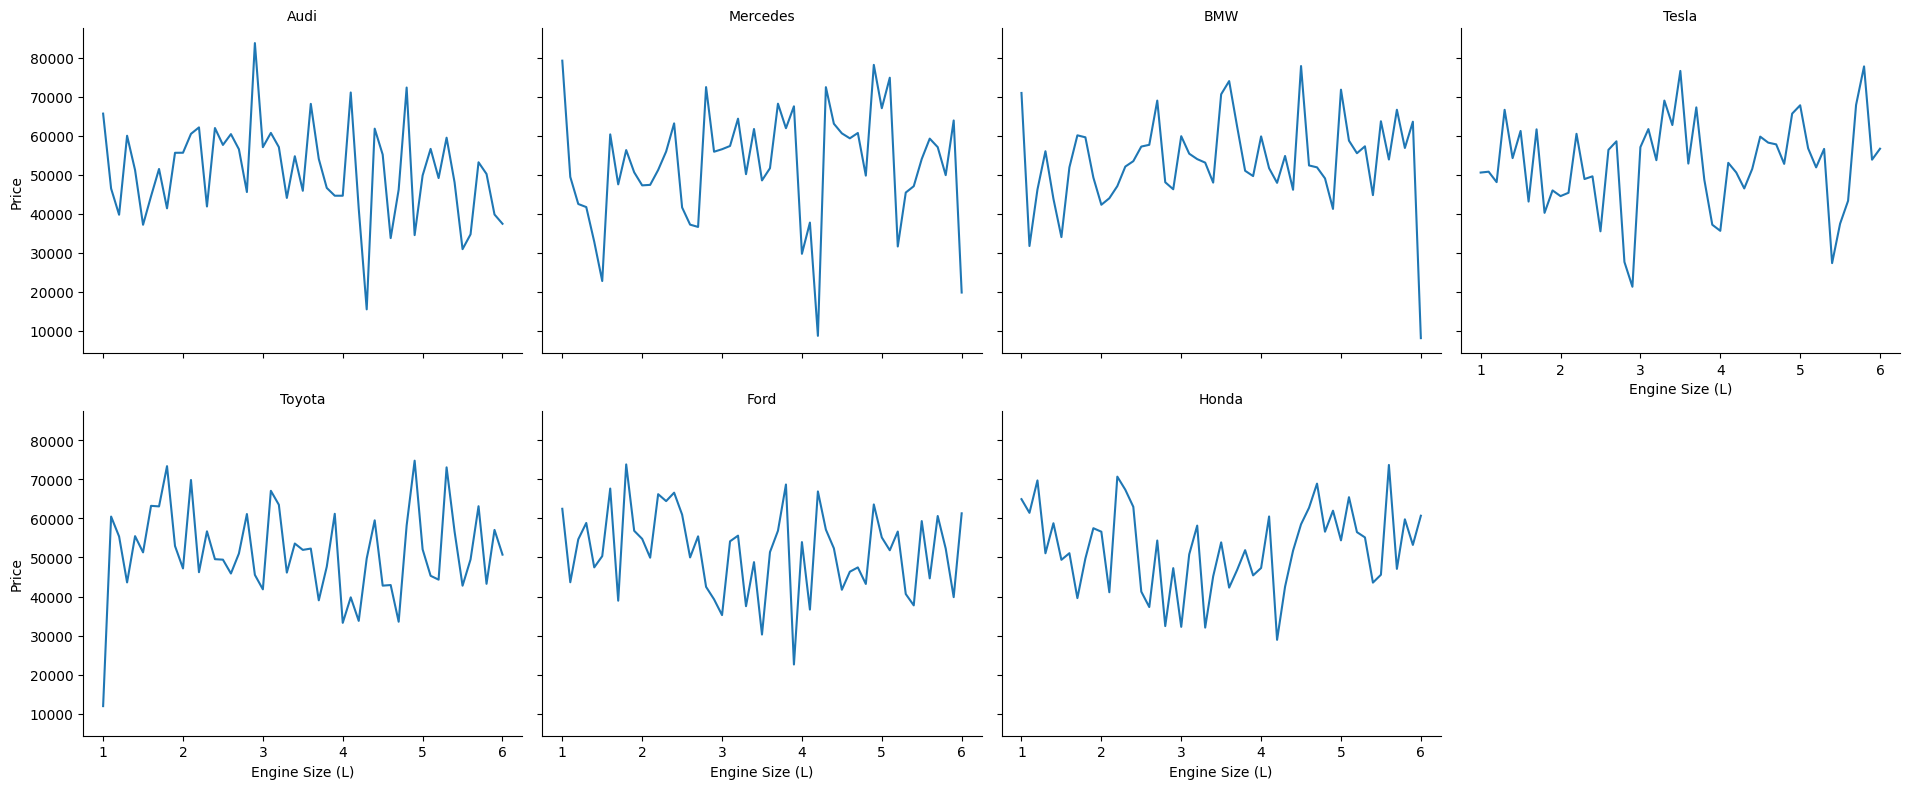

In [133]:
g = sns.FacetGrid(price_by_engine_sizes_brand, col="Brand", col_wrap=4, height=4, aspect=1.2) 
g.map(sns.lineplot, "Engine Size", "Price")

g.set_axis_labels("Engine Size (L)", "Price")
g.set_titles("{col_name}")

plt.tight_layout()

plt.show()

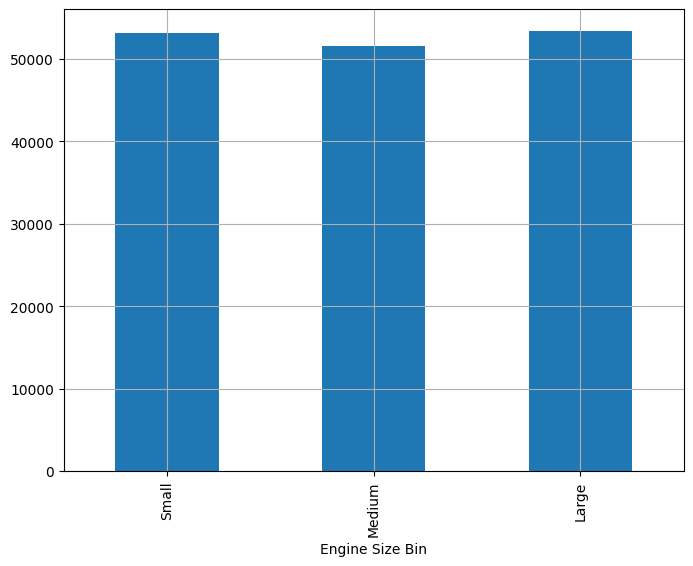

In [33]:
bin_labels = ["Small", "Medium", "Large"]
df["Engine Size Bin"] = pd.cut(df["Engine Size"], bins=3, labels=bin_labels)

avg_price_by_engine_size = df.groupby(["Engine Size Bin"], observed=True)["Price"].mean()

avg_price_by_engine_size.plot(kind="bar", figsize=(8, 6))
plt.grid(True)

In [34]:
correlation_engine = df["Engine Size"].corr(df["Price"])
print(f"Correlation between Engine Size and Price: {round(correlation_engine,5)}")
print(correlation_engine)

Correlation between Engine Size and Price: -0.00442
-0.00442022659353686


In [35]:
avg_price_by_engine_size.reset_index()

Engine Size Bin         Price
0           Small  53097.614690
1          Medium  51543.611123
2           Large  53340.319812

This indicates that there isn't a strict linear relationship between engine size and price. Instead the price seems to increase for both extemes,while the medium-sized engines may have a slightly lower price. 

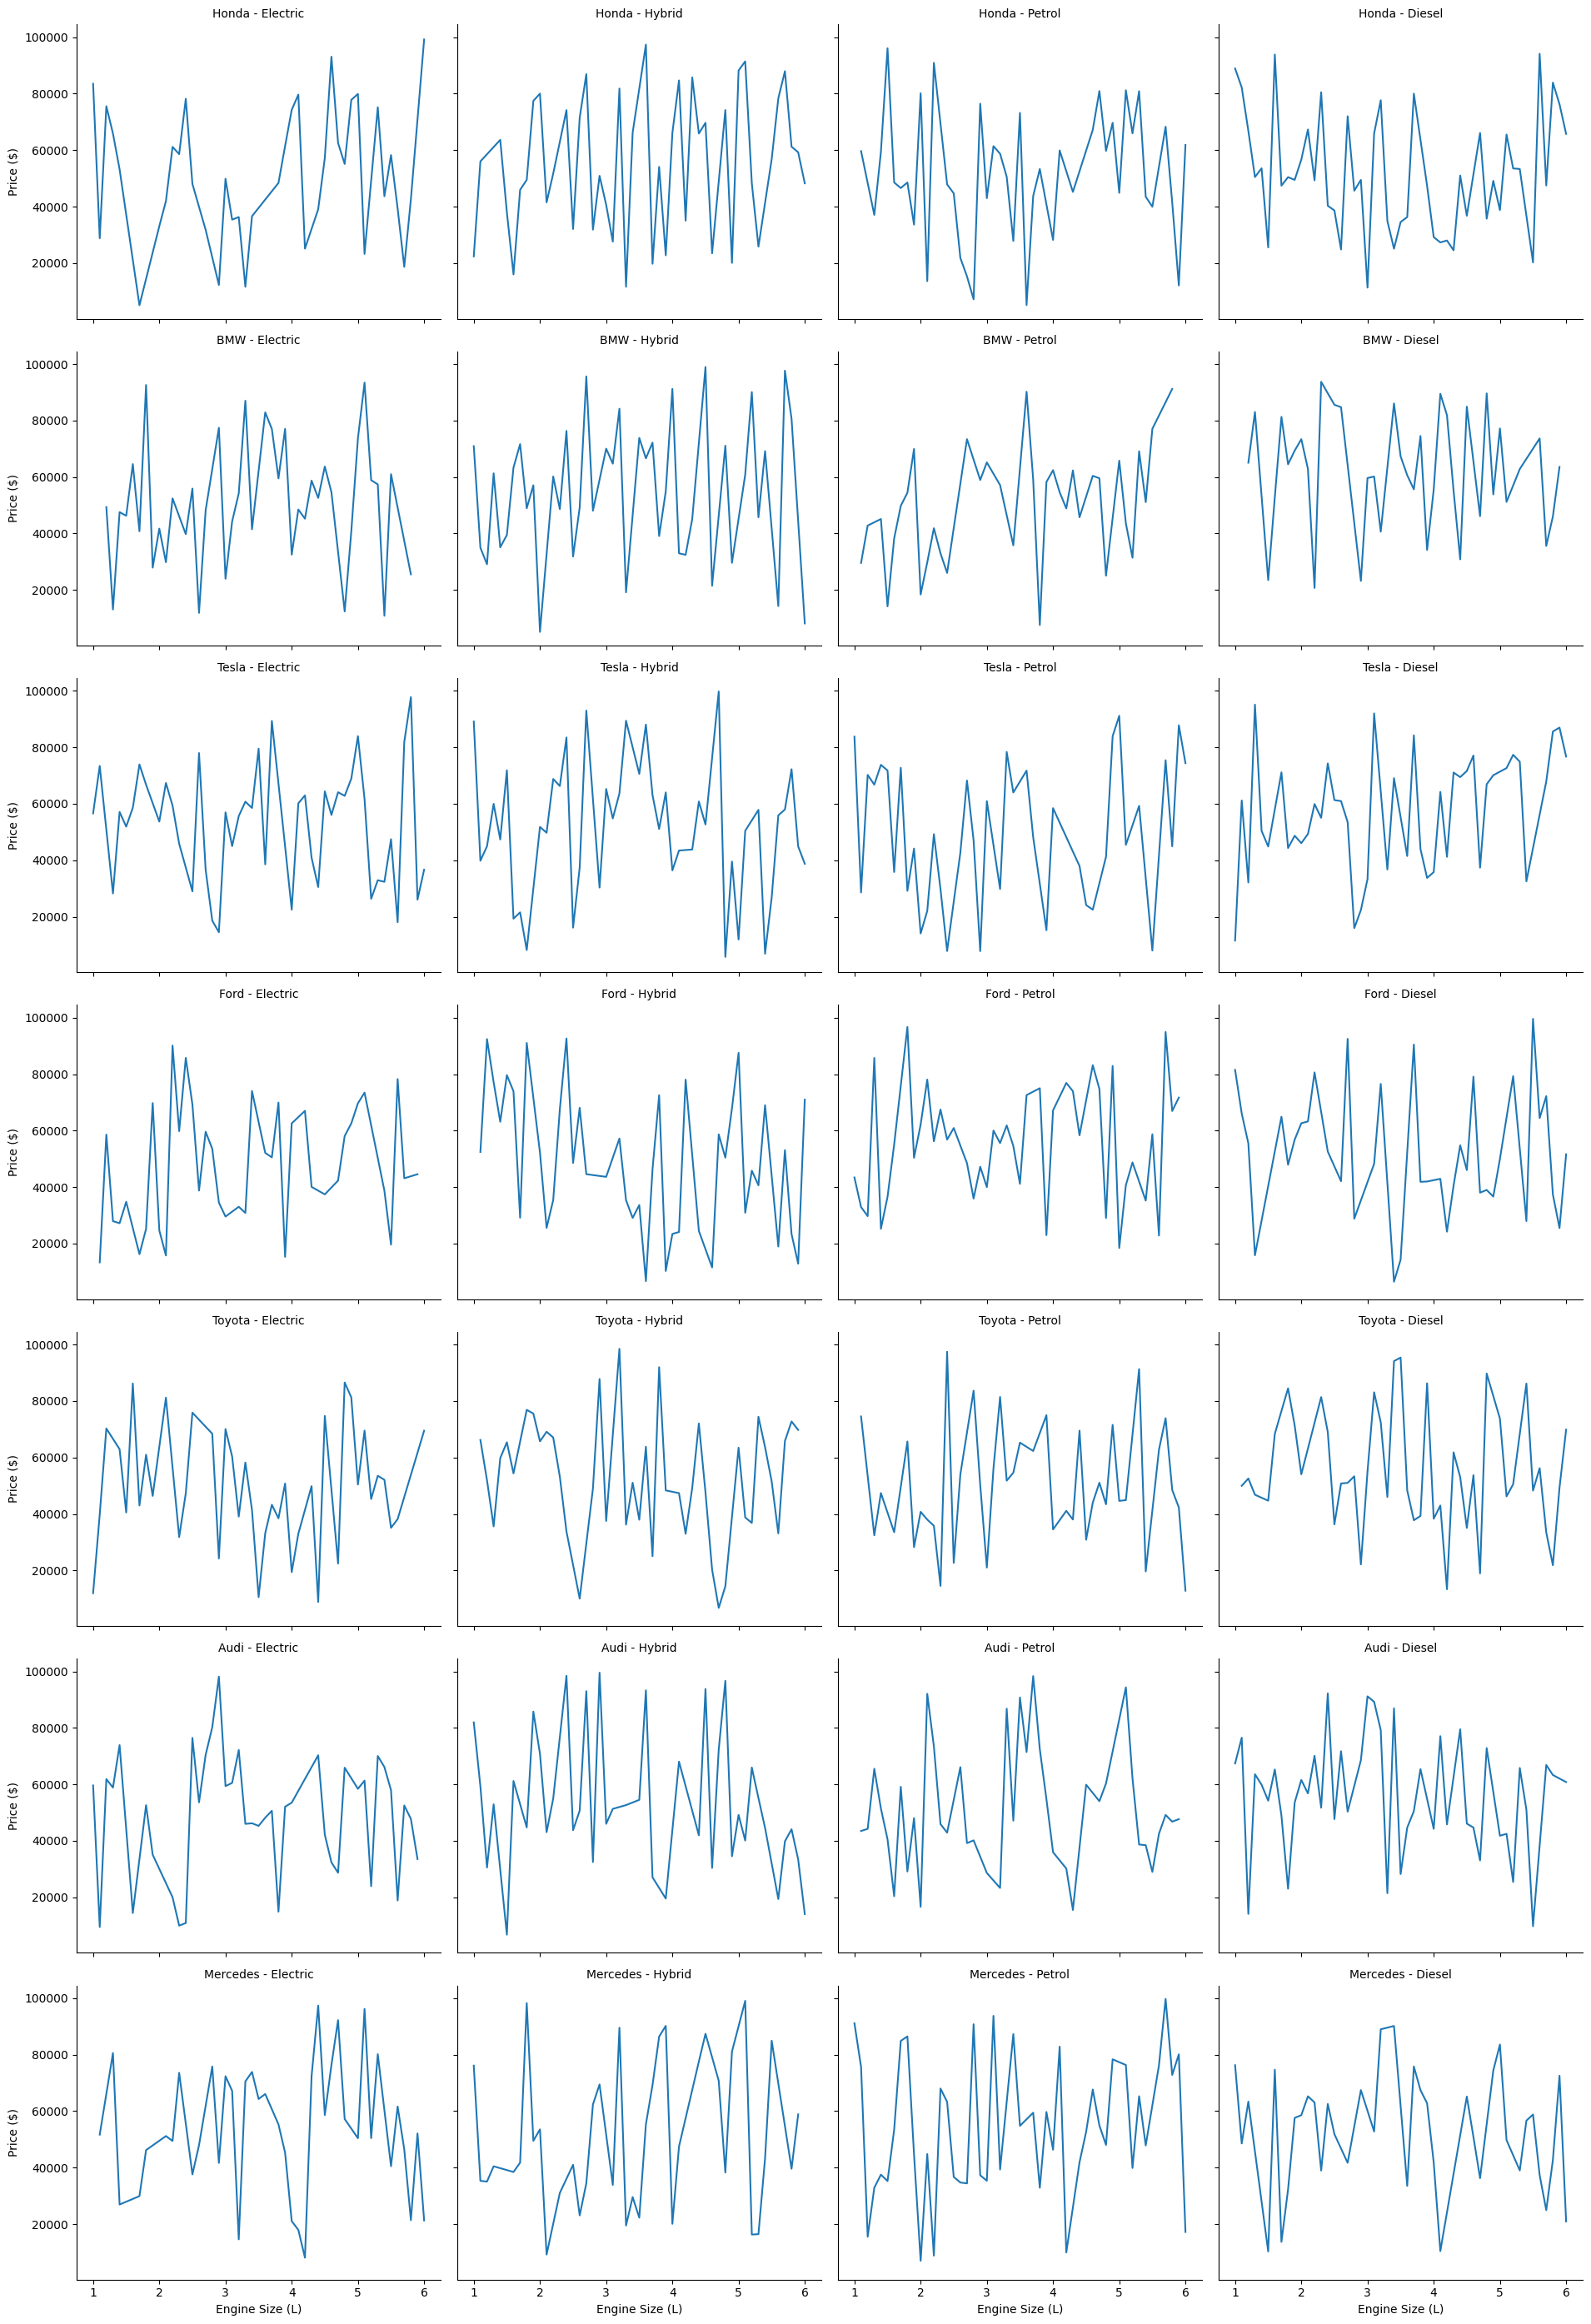

In [36]:
g = sns.FacetGrid(price_by_engine_sizes_brand, col="Fuel Type", row="Brand", height=4, aspect=1.2)

g.map(sns.lineplot, "Engine Size", "Price")

g.set_axis_labels("Engine Size (L)", "Price ($)")
g.set_titles(
    "{row_name} - {col_name}"
)  

plt.tight_layout()

plt.show()

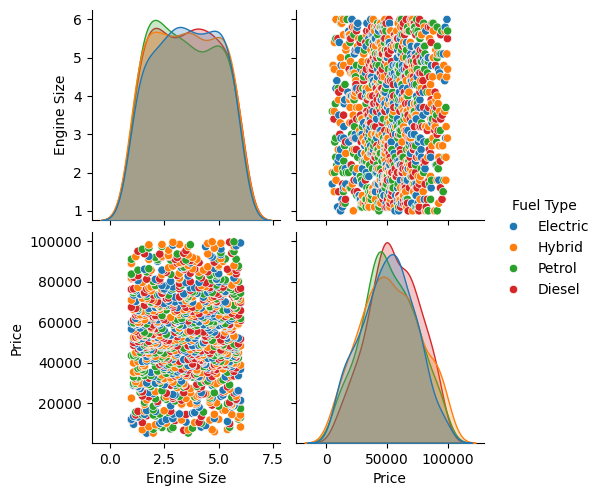

In [37]:
sns.pairplot(price_by_engine_sizes_brand[["Engine Size", "Price", "Fuel Type", "Brand"]], hue="Fuel Type")

# Show the plot
plt.show()

There is no clear or distinct pattern between Price and Brand when segmented by Fuel type. 

# Mileage vs Price

In [38]:
mileage = df['Mileage'].nunique()
print(mileage)

2490


In [39]:
price_by_mileage = df.groupby("Mileage", observed=True)['Price'].mean().reset_index()
price_by_mileage = price_by_mileage.sort_values(by='Price', ascending=True)

price_by_mileage


Mileage     Price
933    112684   5011.27
955    114463   5022.86
716     85366   5060.75
1351   161554   5107.22
1750   212373   5124.89
...       ...       ...
2233   271372  99605.33
1315   158502  99794.46
932    112557  99905.90
1366   162818  99968.62
375     44406  99982.59

[2490 rows x 2 columns]

<Axes: xlabel='Mileage', ylabel='Price'>

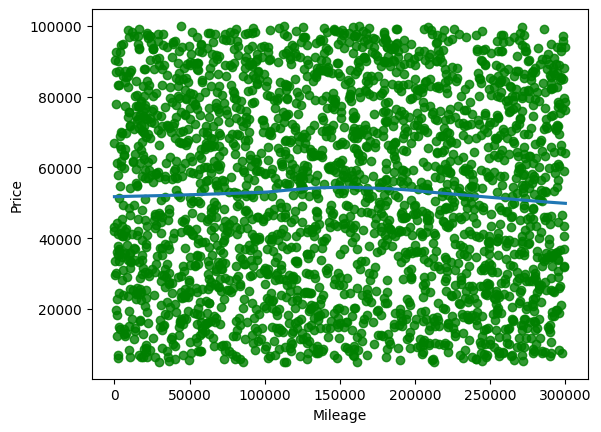

In [40]:
sns.regplot(x='Mileage', y='Price', data=price_by_mileage, lowess=True, scatter_kws={'color':'green'})

In [41]:
correlation_mileage = df['Mileage'].corr(df['Price'])
print(f'Correlation between Mileage and Price: {round(correlation_mileage,5)}')
print(correlation_mileage)

Correlation between Mileage and Price: -0.00857
-0.008567419950321715


There is almost no linear relationship between these two variables. We gonna check further by adding bins.

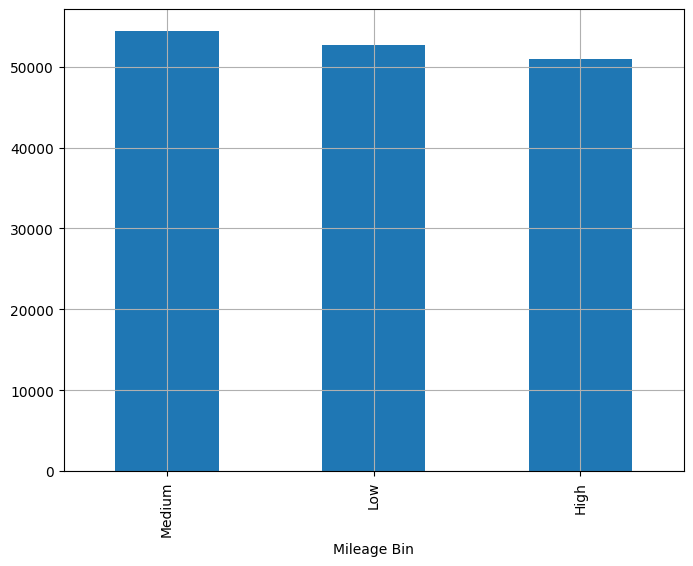

In [42]:
bin_labels = ['Low', 'Medium', 'High']
df['Mileage Bin'] = pd.cut(df['Mileage'], bins=3, labels=bin_labels)

avg_price_by_mileage = df.groupby(['Mileage Bin'], observed=True)['Price'].mean()
avg_price_by_mileage = avg_price_by_mileage.sort_values(ascending=False)

avg_price_by_mileage.plot(kind='bar', figsize=(8,6))
plt.grid(True)

In [43]:
avg_price_by_mileage.reset_index()

Mileage Bin         Price
0      Medium  54378.166242
1         Low  52656.040736
2        High  50929.498466

Mileage does influennce Price, it isn't a strict linear relationship. Cars with moderate mileage are priced higher than those with very low or very high mileage. 

## Fuel Type vs Price

In [44]:
fuel_type

array(['Petrol', 'Electric', 'Diesel', 'Hybrid'], dtype=object)

In [45]:
price_by_fuel_type = df.groupby(['Fuel Type'], observed=True)['Price'].mean()
price_by_fuel_type = price_by_fuel_type.sort_values(ascending=False)

price_by_fuel_type.reset_index()

Fuel Type         Price
0    Diesel  54996.997588
1    Hybrid  52547.394759
2    Petrol  51767.918016
3  Electric  51103.013534

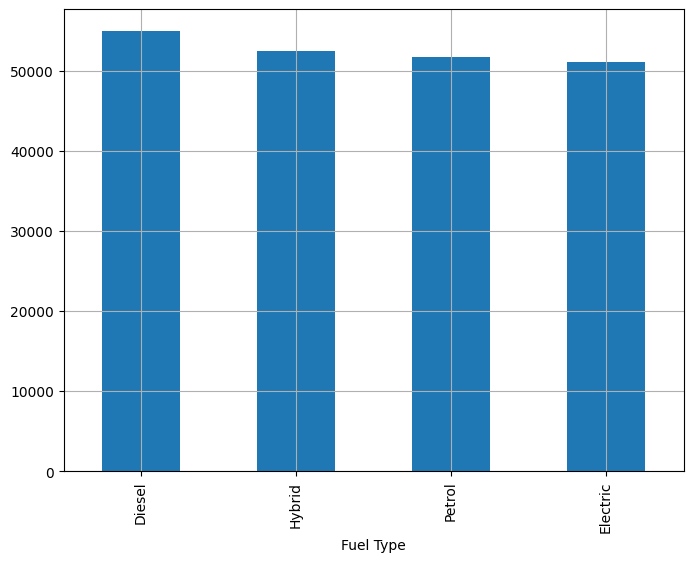

In [46]:
price_by_fuel_type.plot(kind='bar', figsize=(8,6))
plt.grid(True)

* Diesel has the highest average price, followed by Hybrid, Petrol, and Electtric. 
* The difference between the average prices are not extremely large, with Disel being about $3,500 more expensive than Hybrid and only around $1,000 more than Petrol and Electric.

In [47]:
price_by_fuel_brand = df.groupby(['Brand','Fuel Type'], observed=True)["Price"].mean().reset_index()
price_by_fuel_brand = price_by_fuel_brand.sort_values(by='Price', ascending=False)

(price_by_fuel_brand)

Brand Fuel Type         Price
4        BMW    Diesel  59334.373587
0       Audi    Diesel  56574.073814
20     Tesla    Diesel  56368.296818
6        BMW    Hybrid  55599.859302
24    Toyota    Diesel  55101.860280
14     Honda    Hybrid  55014.680805
16  Mercedes    Diesel  54449.243494
17  Mercedes  Electric  54237.306707
11      Ford    Petrol  54045.716813
19  Mercedes    Petrol  53719.672870
21     Tesla  Electric  53285.740600
8       Ford    Diesel  52679.123294
26    Toyota    Hybrid  52509.856875
23     Tesla    Petrol  52309.159067
10      Ford    Hybrid  52169.371628
15     Honda    Petrol  51919.030920
22     Tesla    Hybrid  51733.169529
1       Audi  Electric  51376.561170
7        BMW    Petrol  50992.418764
12     Honda    Diesel  50711.301262
5        BMW  Electric  50654.630879
13     Honda  Electric  50602.706667
2       Audi    Hybrid  50374.120000
18  Mercedes    Hybrid  50099.797125
25    Toyota  Electric  49961.358506
27    Toyota    Petrol  49928.105476
3       Audi    Petrol  49182.028125
9       Ford  Electric  47298.914706

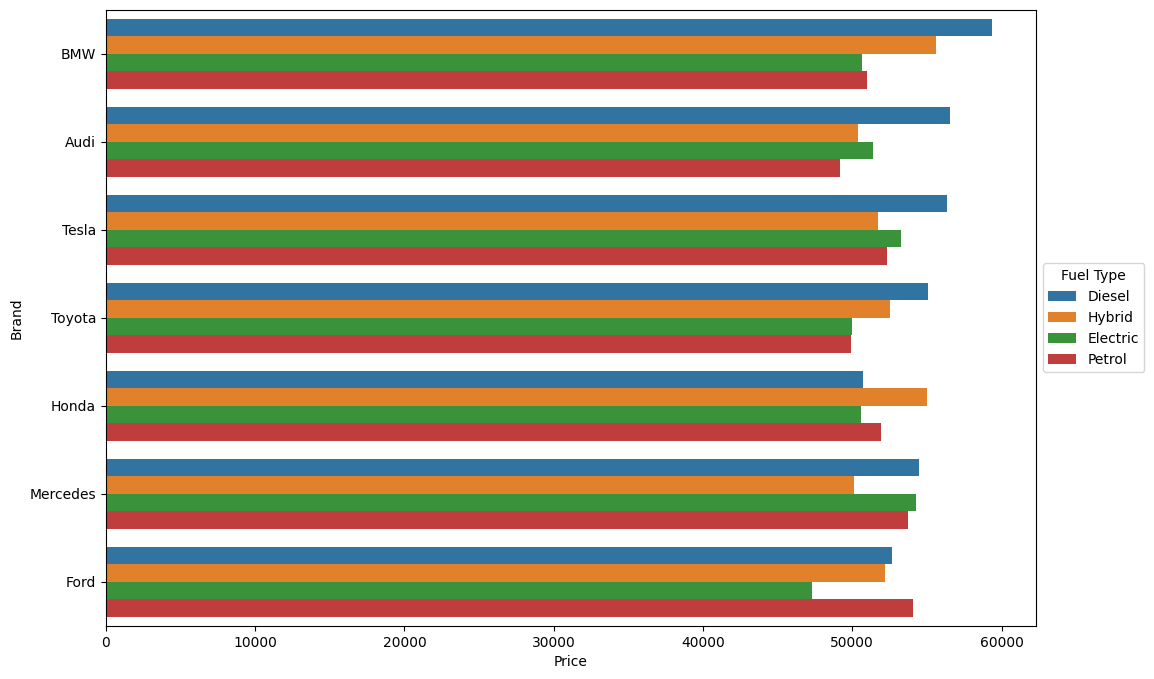

In [48]:
plt.figure(figsize=(12,8))

sns.barplot(data=price_by_fuel_brand, x='Price', y='Brand', hue='Fuel Type', dodge=True)

plt.legend(title="Fuel Type", loc="center left", bbox_to_anchor=(1, 0.5))

* Brand plays a significant role in pricing, where luxury brands like BMW, Mercedes, and Tesla have higher price points regardless of fuel type. 
* Fuel Type affects price, with Disel and Electric typically commanding higher pricees for certain brands, while Hybrid models offer  a middle ground. Petrol models tend to be cheaper for more mainstream brands.

## Transmission vs Price 

In [49]:
price_by_transmission = df.groupby('Transmission', observed=True)['Price'].mean()

price_by_transmission = price_by_transmission.sort_values(ascending=False)


price_by_transmission.reset_index()

Transmission         Price
0    Automatic  52691.684639
1       Manual  52589.119450

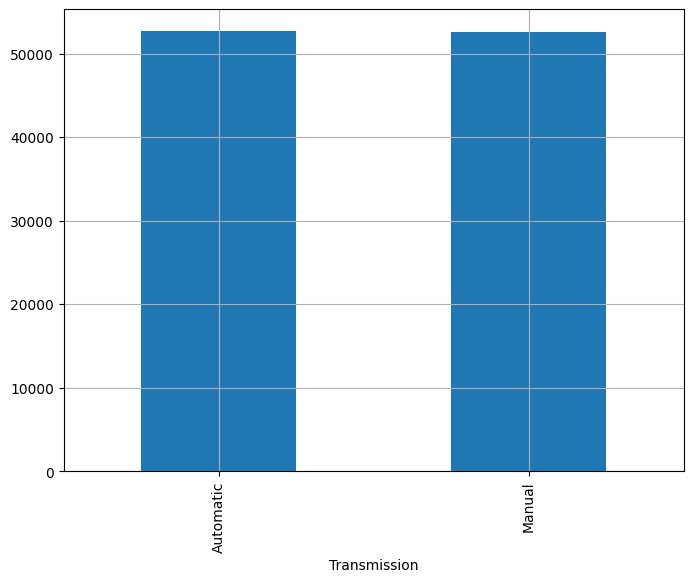

In [50]:
price_by_transmission.plot(kind='bar', figsize=(8,6))
plt.grid(True)

The difference between the two transmission types is minimal,suggestin that Transmissioon may not have a large impact on the prie for this dataset.

# Condition vs Price

In [109]:
conditions = ["New", "Used", "Like New"]

years_by_condition = {}

for condition in conditions:
    condition_data = df[df["Condition"] == condition]

    years = condition_data["Year"].tolist()
    years_by_condition[condition] = years

    if years:
        min_year = min(years)
        max_year = max(years)
        print(f"Condition '{condition}': Min Year = {min_year}, Max Year = {max_year}")
    else:
        print(f"Condition '{condition}': No data available")

Condition 'New': Min Year = 2000, Max Year = 2023
Condition 'Used': Min Year = 2000, Max Year = 2023
Condition 'Like New': Min Year = 2000, Max Year = 2023


Condition is here about ownership status, nothing to do with year. 

In [112]:
df.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model', 'Year_Category',
       'Engine Size Bin', 'Mileage Bin', 'Price_Category'],
      dtype='object')

In [118]:
price_by_condition = df.groupby(["Condition", "Year"], observed=True)["Price"].mean().reset_index()
#price_by_condition = price_by_condition.sort_values(ascending=True)

price_by_condition

Condition  Year         Price
0   Like New  2000  47859.836667
1   Like New  2001  52783.797297
2   Like New  2002  57468.771818
3   Like New  2003  49502.096000
4   Like New  2004  51663.412258
..       ...   ...           ...
67      Used  2019  52808.845366
68      Used  2020  50472.871837
69      Used  2021  48547.543750
70      Used  2022  59383.073871
71      Used  2023  58289.992857

[72 rows x 3 columns]

In [119]:
import plotly.io as pio

pio.renderers.default = "notebook"
fig = px.treemap(
    price_by_condition,
    path=["Condition", "Year"],
    values="Price",
    title="Impact of Condition and Year on Price (Treemap)",
    color="Price",
    hover_data=["Price"],
    color_continuous_scale="RdYlBu",
)

fig.update_layout(template="plotly_dark", width=800, height=600)
fig.write_html("condition.html")

import webbrowser

webbrowser.open("condition.html")

True

The price of a car is influenced by both its condition and manfacturing year, with each factor playing a distinct role. "New" cars generally have higher prices due to their unused status, but the manufacturing year still impacts the price. New cars valued for modernity and older cars gaining value is still "New". 

<Axes: xlabel='Condition'>

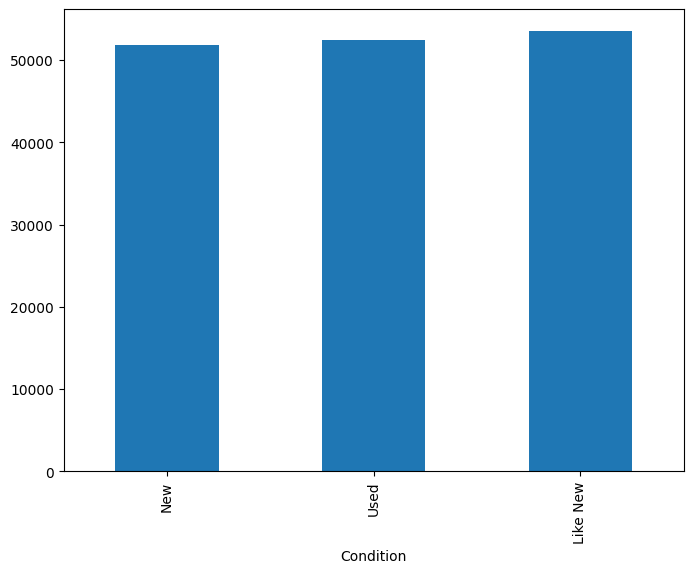

In [52]:
price_by_condition.plot(kind='bar', figsize=(8,6))

# Market Trends and Insights

### Price

C:\Users\asif\AppData\Local\Temp\ipykernel_15900\3928787031.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




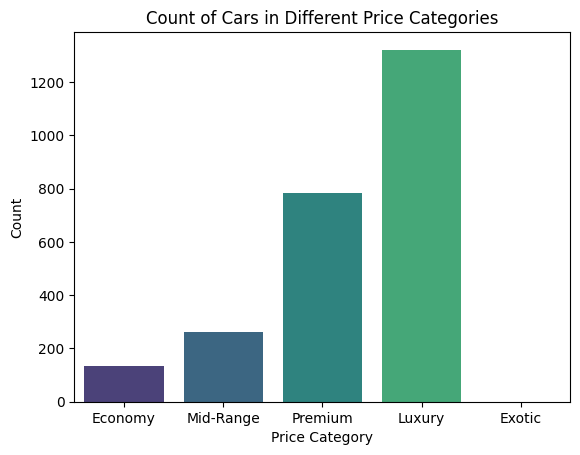

In [76]:
bins = [0, 10000, 20000, 50000, 100000, float("inf")]
labels = ["Economy", "Mid-Range", "Premium", "Luxury", "Exotic"]
df["Price_Category"] = pd.cut(df["Price"], bins=bins, labels=labels)

sns.countplot(x="Price_Category", data=df, palette="viridis")
plt.title("Count of Cars in Different Price Categories")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()

In [77]:
correlation_mileage

np.float64(-0.008567419950321715)

In [175]:

print(f"Correlation between mileage and price: \n{correlation_mileage}\n")

X = df["Mileage"].values.reshape(-1, 1)
y = df["Price"].values
fig = px.scatter(
    df,
    x="Mileage",
    y="Price",
    color="Brand",
    title="Mileage vs. Price",
    labels={"Mileage": "Mileage (M)", "Price": "Price ($)"},
    hover_data=["Model"],
)

fig.update_layout(template="plotly_dark", width=800, height=500)
fig.write_html('Milleage vs Price.html')

Correlation between mileage and price: 
-0.008567419950321715



In [176]:
webbrowser.open("Milleage vs Price.html")

True

# Conclusion

### Brand and Model Impact: 
* Luxury brands, such as BMW, Mercedess, and Tesla, dominate the higher end of the price  spectrum.BMW stands out for having significant price fluctiations, with peak values seen in years like 2007 and 2015. Specific model like Merceded GLC and BMW 3 Series show a considerable impact on price. 
* Mainstream Brand such as Ford, Toyota, Audi, and Honda have a more stable pricing trend. 

### Economic Cycles and Events:
* Economic events play a significant role in shaping pricing patterns. For example, the 2008 financial crisis led to price drops, paricularly for luxury cars,as consumer demand for high-end vehicles decreased.The recovery period after 2010 led to a price surge, reflecting higher demand for newer models. The covid-19 pandemic caused disruptions, resulting in a noticeable price dip in 2020, especially for older model. 

### Fuel type:
* Fuel Type  has a clear impact on car prices. Diesel vehicles tend to have the ighest average pricecss, followed by hybrid cars, while Electric and Petrol cars are generally more affordable. The difference in prices are not drastic, but they do indicate that Diesel cars are favored for certain hhigh-end models, and Electric vehicles are gaining traction, especially post-2020.

### Condition and Mileage:
* The condition of the car plays a central role in pricing, with 'New' cars generally being priced higher due to their unused status. However,older models may still maintain value if they are well-preserved, highlighting the importance of both condition and year of manfacture in determining price. 
* Mileage also affects price. Cars with moderate mileage are priced higher compared to those with very low or very high mileage, likely due to demand for vehicles with a balanced use history. 

### Engine Size:
* Larger or smaller engine sizes don't necessarily equate to higher or lower prices, indicating that other factors, such as brand, model, and condition are more influential in determining car prices. 

### Transmission:
* The affect of transmission type on price minimal in this dataset, suggesting that other factors, like brnd and model,year have a fair more significant impact on price that type of tranmission. 
